# Test: Data analyses 2

**Author:** Maxime ABITBOL 21305862     
**Teacher:** Franck LIN - ADD2

## 1. Exercise 1 (60%)

### Import

In [1]:
import numpy as np
import pandas as pd
import seaborn
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

import random
random.seed(30)

import time 

### Settings

In [2]:
!pwd
!ls ../data/

/home/maxime/Documents/Study/M1/ADD2/Exam/Data-Analyses-ADD2/src
Faces_Test_Inputs.csv  Faces_Train_Inputs.csv  Uber_data.csv
Faces_Test_Labels.csv  Faces_Train_Labels.csv


In [3]:
PATH_DATA = "../data/"
PATH_TRAIN_X = PATH_DATA + "Faces_Train_Inputs.csv"
PATH_TRAIN_Y = PATH_DATA + "Faces_Train_Labels.csv"
PATH_TEST_X = PATH_DATA + "Faces_Test_Inputs.csv"
PATH_TEST_Y = PATH_DATA + "Faces_Test_Labels.csv"

### Load Data

In [4]:
df_train_x = pd.read_csv(PATH_TRAIN_X, sep=",", header=None)
df_train_y = pd.read_csv(PATH_TRAIN_Y, sep=",", header=None)
df_test_x = pd.read_csv(PATH_TEST_X, sep=",", header=None)
df_test_y = pd.read_csv(PATH_TEST_Y, sep=",", header=None)

## 1.1 Describe data & Face mean

Train y: 320 images, 40 people, 8 image of same people, dataset corresponding to the label

In [5]:
df_train_y.head()

,0,1,2,3,4,5,6,7,8,9,...,310,311,312,313,314,315,316,317,318,319
0,1,1,1,1,1,1,1,1,2,2,...,39,39,40,40,40,40,40,40,40,40


Test y: 80 images, 40 people, 2 image of same people

In [6]:
df_test_y.head()

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,1,1,2,2,3,3,4,4,5,5,...,36,36,37,37,38,38,39,39,40,40


Train x: 10304 pixels per images (92x112)

In [7]:
df_train_x.head()

,0,1,2,3,4,5,6,7,8,9,...,10294,10295,10296,10297,10298,10299,10300,10301,10302,10303
0,0.18824,0.17647,0.17647,0.19216,0.18039,0.18431,0.17647,0.18431,0.18824,0.207840,...,0.18431,0.17255,0.18431,0.20392,0.18824,0.192160,0.176470,0.180390,0.18431,0.180390
1,0.23529,0.22745,0.26667,0.30980,0.19216,0.16863,0.20392,0.20392,0.21961,0.282350,...,0.14510,0.15686,0.14118,0.12549,0.12941,0.145100,0.141180,0.129410,0.12157,0.133330
2,0.15294,0.17255,0.23137,0.21176,0.24314,0.27059,0.29020,0.23922,0.17255,0.184310,...,0.15294,0.14510,0.13333,0.12157,0.12549,0.133330,0.109800,0.109800,0.10588,0.113730
3,0.24706,0.21961,0.20392,0.15686,0.16863,0.16863,0.11373,0.11765,0.11765,0.094118,...,0.16078,0.16078,0.13725,0.12549,0.10588,0.094118,0.090196,0.098039,0.10980,0.094118
4,0.25098,0.23529,0.24706,0.20784,0.23529,0.16078,0.11765,0.10980,0.14902,0.215690,...,0.15686,0.17255,0.15686,0.16863,0.16471,0.160780,0.160780,0.137250,0.16471,0.152940


In [8]:
df_train_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Columns: 10304 entries, 0 to 10303
dtypes: float64(10304)
memory usage: 25.2 MB


Test x: 10305 pixels per images

In [9]:
df_test_x.head()

,0,1,2,3,4,5,6,7,8,9,...,10294,10295,10296,10297,10298,10299,10300,10301,10302,10303
0,0.164706,0.160784,0.211765,0.188235,0.168627,0.156863,0.180392,0.176471,0.160784,0.160784,...,0.168627,0.156863,0.160784,0.164706,0.180392,0.164706,0.168627,0.156863,0.152941,0.160784
1,0.133333,0.137255,0.133333,0.133333,0.149020,0.141176,0.117647,0.105882,0.094118,0.105882,...,0.184314,0.172549,0.184314,0.168627,0.164706,0.149020,0.164706,0.160784,0.152941,0.129412
2,0.168627,0.149020,0.152941,0.145098,0.156863,0.160784,0.164706,0.168627,0.176471,0.152941,...,0.125490,0.125490,0.117647,0.109804,0.105882,0.098039,0.105882,0.109804,0.121569,0.552941
3,0.145098,0.121569,0.133333,0.149020,0.160784,0.156863,0.149020,0.164706,0.156863,0.152941,...,0.117647,0.121569,0.105882,0.098039,0.101961,0.090196,0.101961,0.105882,0.262745,0.521569
4,0.407843,0.407843,0.415686,0.419608,0.419608,0.423529,0.396078,0.419608,0.415686,0.407843,...,0.215686,0.227451,0.207843,0.215686,0.239216,0.243137,0.250980,0.247059,0.235294,0.219608


In [10]:
df_test_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Columns: 10304 entries, 0 to 10303
dtypes: float64(10304)
memory usage: 6.3 MB


### Face mean (from train set)

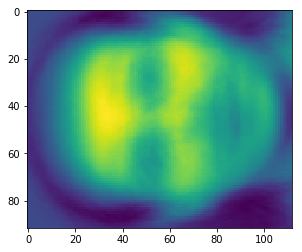

In [11]:
face_mean = np.mean(df_train_x)
matr_face_mean = np.reshape(face_mean.values, (92,112))
plt.imshow(matr_face_mean)

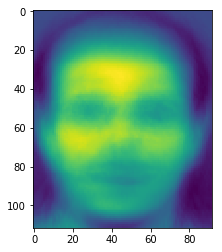

In [12]:
# to put the image in the right direction
plt.imshow(matr_face_mean.transpose())

## 1.2 PCA Reduction

In [120]:
from sklearn.preprocessing import StandardScaler

def my_PCA(k, X=df_train_x):
    pca = PCA(k)
    X_reduced = pca.fit_transform(scale(X))
    return X_reduced

print(df_train_x.shape)

(320, 10304)


In [121]:
def PCAvar(k):
    pca = PCA(k)
    pca.fit_transform(scale(df_train_x))
    eig = pd.DataFrame(
        {
            "Dimension" : ["Dim" + str(x + 1) for x in range(k)], 
            "Valeur_propre" : pca.explained_variance_,
            "var_exp" : np.round(pca.explained_variance_ratio_ * 100),
            "sum_var_exp" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
        },
        columns = ["Dimension", "Valeur_propre", "var_exp", "sum_var_exp"]
    )
    return(eig)

Reduction with k=5

In [122]:
X_reduced5 = my_PCA(k=5)
X_reduced5.shape

(320, 5)

In [123]:
PCAvar(5)

,Dimension,Valeur_propre,var_exp,sum_var_exp
0,Dim1,1619.416811,16.0,16.0
1,Dim2,1348.625028,13.0,29.0
2,Dim3,854.982789,8.0,37.0
3,Dim4,581.500274,6.0,43.0
4,Dim5,504.617660,5.0,47.0


**The variance explains here only 47% of the model**

Reduction with k=10

In [17]:
X_reduced10 = my_PCA(k=10)
X_reduced10.shape

(320, 10)

In [18]:
PCAvar(10)

,Dimension,Valeur_propre,var_exp,sum_var_exp
0,Dim1,1619.416811,16.0,16.0
1,Dim2,1348.625028,13.0,29.0
2,Dim3,854.982789,8.0,37.0
3,Dim4,581.500274,6.0,43.0
4,Dim5,504.617660,5.0,47.0
5,Dim6,319.685040,3.0,51.0
6,Dim7,262.555024,3.0,53.0
7,Dim8,230.339618,2.0,55.0
8,Dim9,219.854041,2.0,57.0
9,Dim10,202.799484,2.0,59.0


**The variance explains here only 59% of the model**

Reduction with k=50

In [19]:
X_reduced50 = my_PCA(k=50)
X_reduced50.shape

(320, 50)

In [20]:
PCA50 = PCAvar(50).sort_values(by = 'sum_var_exp', ascending= False)
PCA50.head()

,Dimension,Valeur_propre,var_exp,sum_var_exp
49,Dim50,25.531980,0.0,82.0
48,Dim49,26.136130,0.0,82.0
47,Dim48,27.334815,0.0,82.0
46,Dim47,27.920145,0.0,81.0
45,Dim46,28.691352,0.0,81.0


**The variance explains here 82% of the model**

With these results, it is likely that we are losing more information the $k$ of the PCA is small.

## 1.3 Plot image with PCA

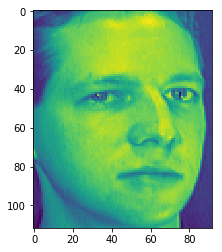

In [21]:
# test with the face number 5 without PCA
face5 = df_train_x.loc[4]
image5 = np.reshape(face5.values, (92,112))
plt.imshow(image5.transpose())

**Function that perform a PCA, rebuild the image and display it**

In [99]:
from sklearn import preprocessing

def PCAshow(k):
    pca = PCA(k)
    lower_dimension_data = pca.fit_transform(preprocessing.scale(df_train_x)) # PCA on data
    approximation = pca.inverse_transform(lower_dimension_data)  # Reconstruct Images
    face5pca = approximation[4] # Select Image 5
    image5pca = np.reshape(face5pca, (92,112)) # Image to Matrix 
    plt.imshow(image5pca.transpose()) # Plot image

**The same picture with a pca for k = 5**

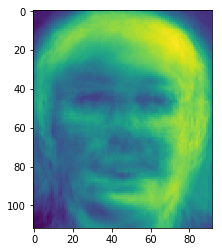

In [98]:
PCAshow(5)

**the same picture with a pca for k = 10**

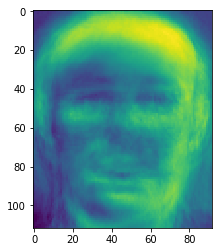

In [24]:
PCAshow(10)

**the same picture with a pca for k = 50**

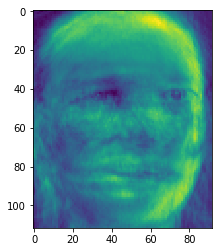

In [25]:
PCAshow(50)

## 1.4 How to accelerate PCA?

- Reduce the number of images to train (rows)
- Reduce the initial number of columns

### **Resize images to accelerate the PCA**

Creation of a new PCA function that allows learning with `df_train_x` data on test data

In [26]:
def my_PCA2(k, X=df_train_x, Y=df_test_x):
    pca = PCA(n_components = k, svd_solver = 'full')
    data_pca_train = pca.fit_transform(scale(X))
    data_pca_test  = pca.transform(scale(Y))
    return(data_pca_train, data_pca_test)

In [27]:
liste = []
ligne = range(320)


for a in range(0,len(df_train_x.columns),4):
    liste.append(df_train_x.loc[ligne, [a,a+1,a+2,a+3]].mean(1))

df_train_x_reduce = pd.DataFrame(liste).T
  

In [28]:
liste2 = []
ligne2 = range(80)

for a in range(0,len(df_test_x.columns),4):
    liste2.append(df_test_x.loc[ligne2, [a,a+1,a+2,a+3]].mean(1))

df_test_x_reduce = pd.DataFrame(liste2).T

In [29]:
df_train_x_reduce.shape, df_test_x_reduce.shape

((320, 2576), (80, 2576))

In [126]:
tic = time.time()
my_PCA2(50)
tac = time.time()
tac - tic 

0.32899904251098633

In [31]:
tic = time.time()
my_PCA2(50, X = df_train_x_reduce, Y = df_test_x_reduce)
tac = time.time()
tac - tic 

0.10484790802001953

The pca is faster but we have to check that the predictions are good (1.6)

## 1.5 Classification with K Nearest Neighborhood

### Implementation of KNN

In [32]:
def euclidean_dist(X_train_elm, elm):
    dist = np.sqrt(np.sum(pow(elm - X_train_elm, 2)))
    return dist

In [33]:
def find_nn(X_train, elm, k):
    dist_arr = {}
    
    for X_train_elm, i in zip(X_train.values, range(1, X_train.shape[0] + 1)):
        dist = euclidean_dist(X_train_elm, elm)        
        dist_arr[i] = dist

    arr_sort = sorted(dist_arr.items(), key=lambda kv: kv[1])
    
    return arr_sort[0:k]

In [34]:
def max_nn(k_nn, Y_train):
    index_nn = [tupl[0] - 1 for tupl in k_nn]
    
    #print(index_nn)
    
    
    k_nn_classe = Y_train[index_nn]
    k_nn_classe = np.ndarray.tolist(k_nn_classe)
    
    return max(k_nn_classe, key=k_nn_classe.count)

In [35]:
def my_knn(X_train, Y_train, X_test, k):
    Y_pred = []
    
    for elm in X_test.values:
        k_nn = find_nn(X_train, elm, k)
        classe = max_nn(k_nn, Y_train)
        Y_pred.append(classe)
        
    return Y_pred

## 1.6 Prediction

### Test our KNN without PCA

In [36]:
# Get Y train values
Y_train = df_train_y.values.T
Y_train = Y_train.ravel()
# like: Y_train = Y_train.reshape(Y_train.shape[0], )

Y_test = df_test_y.values.T
Y_test = Y_test.ravel()

print("Shape of Y_train: {}\nShape of Y_test: {}".format(Y_train.shape, Y_test.shape))

Shape of Y_train: (320,)
Shape of Y_test: (80,)


In [37]:
Y_pred = my_knn(df_train_x, Y_train, df_test_x, 5)

In [38]:
_ = [print(elm, ' ', end='') for elm in Y_pred]

1  1  2  2  3  3  4  4  5  18  6  6  7  7  8  8  9  9  10  8  11  11  12  12  13  13  14  14  15  15  16  16  17  17  18  18  15  19  20  20  21  21  22  22  23  23  24  24  25  25  26  26  27  27  28  28  29  29  30  30  31  31  32  32  33  33  34  34  35  35  36  17  37  37  38  38  39  39  40  5  

In [39]:
from sklearn import metrics

print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred) * 100, '%')

Accuracy: 93.75 %


### Test our KNN with PCA

In [40]:
def knn_pca(k_pca, k_knn, df_train_x, df_test_x):
    X_train_reduced, X_test_reduced = my_PCA2(k_pca)
    # Launch the KNN
    Y_pred = my_knn(pd.DataFrame(X_train_reduced), Y_train, pd.DataFrame(X_test_reduced), k_knn)
    print("For a reduction dimension of {} and a k of {}, the accuracy is: {}%"
          .format(k_pca, k_knn, metrics.accuracy_score(Y_test, Y_pred) * 100))

In [41]:
knn_pca(50, 5, df_train_x, df_test_x)

For a reduction dimension of 50 and a k of 5, the accuracy is: 95.0%


In [42]:
knn_pca(10, 3, df_train_x, df_test_x)

For a reduction dimension of 10 and a k of 3, the accuracy is: 86.25%


In [43]:
knn_pca(5, 7, df_train_x, df_test_x)

For a reduction dimension of 5 and a k of 7, the accuracy is: 72.5%


When a K-Nearest Neigborhood is done **without a PCA**, the accuracy score is **great (~95%) best than without CPA !** The hyperparameter k for the KNN is best with an prime number. 
In another hand, when the face classification is done **with a PCA**, the accuracy score is **the same**, and decrease more the reduction PCA is lower (~85%, ~76%).

**The scores obtained with the PCA are excellent, the PCA saves time on the calculations for a similar result**

In [44]:
tic = time.time()
knn_pca(50, 5, df_train_x, df_test_x)
tac = time.time()
time_with_pca = tac - tic 

For a reduction dimension of 50 and a k of 5, the accuracy is: 95.0%


In [45]:
tic = time.time()
my_knn(df_train_x, Y_train, df_test_x, 5)
tac = time.time()
time_without_pca = tac - tic

In [46]:
time_without_pca / time_with_pca

9.818347482865466

PCA is therefore an excellent method to reduce the size of a matrix by losing very little information.   
For the same result without PCA, the algorithm takes about **11 times longer** !!

---

### **Sklearn KNN test**

In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [48]:
knn = KNeighborsClassifier(n_neighbors = 5, weights = "distance")
knn.fit(df_train_x, np.ravel(df_train_y))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='distance')

In [49]:
predict = knn.predict(df_test_x)
true = np.ravel(df_test_y)
predict == true 

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True, False])

In [50]:
print("The accuracy with knn from sklearn is : {} %".format(knn.score(df_test_x, df_test_y.T)*100))

The accuracy with knn from sklearn is : 93.75 %


In [51]:
# Create a function 

def knn_sklearn(n_neighbors, X_train, X_test) :
    knn = KNeighborsClassifier(n_neighbors = n_neighbors, weights = "distance")
    knn.fit(X_train, np.ravel(df_train_y))
    knn.predict(X_test)
    print("The accuracy with knn from sklearn is : {} %".format(knn.score(X_test, df_test_y.T)*100))

In [52]:
knn_sklearn(5, df_train_x, df_test_x)

The accuracy with knn from sklearn is : 93.75 %


In [53]:
# With PCA
def knn_sklearn_pca(n_neighbors, k_pca, X_train, X_test) :
    X_train_reduced, X_test_reduced = my_PCA2(k_pca)
    knn = KNeighborsClassifier(n_neighbors = n_neighbors, weights = "distance")
    knn.fit(X_train_reduced, np.ravel(df_train_y))
    knn.predict(X_test_reduced)
    print("For a reduction dimension of {} and a k of {}, the accuracy is: {}%"
          .format(k_pca, n_neighbors, knn.score(X_test_reduced, df_test_y.T)*100))
    

In [54]:
knn_sklearn_pca(5, 50, df_train_x, df_test_x)

For a reduction dimension of 50 and a k of 5, the accuracy is: 95.0%


In [55]:
knn_sklearn_pca(5, 10, df_train_x, df_test_x)

For a reduction dimension of 10 and a k of 5, the accuracy is: 87.5%


In [56]:
knn_sklearn_pca(5, 5, df_train_x, df_test_x)

For a reduction dimension of 5 and a k of 5, the accuracy is: 76.25%


**Results similar to our KNN, so it's good**

## 1.7 Improve Model

- Make the model faster
- Subtract the average face from all faces
- Neural Network
- Random Forest
- More data
- Do multiple model of clustering classification and do a voting system like boosting on it

---

### **PCA test with this new reduced dataframe (1.4)**

In [57]:
knn = KNeighborsClassifier(n_neighbors = 5, weights = "distance")
knn.fit(df_train_x_reduce, np.ravel(df_train_y))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='distance')

In [58]:
knn.predict(df_test_x_reduce)

array([ 1,  1,  2,  2,  3,  3,  4,  4,  5, 18,  6,  6,  7,  7,  8,  8,  9,
        9, 10,  8, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 16, 16, 17, 17,
       18, 18, 15, 19, 20, 20, 21, 21, 22, 22, 23, 23, 24, 24, 25, 25, 26,
       26, 27, 27, 28, 28, 29, 29, 30, 30, 31, 31, 32, 32, 33, 33, 34, 34,
       35, 35, 36, 17, 37, 37, 38, 38, 39, 39, 40,  5])

In [59]:
print("The accuracy with knn from sklearn is : {} %".format(knn.score(df_test_x_reduce, df_test_y.T)*100))

The accuracy with knn from sklearn is : 93.75 %


In [60]:
knn_sklearn(5, df_train_x_reduce, df_test_x_reduce)

The accuracy with knn from sklearn is : 93.75 %


In [61]:
knn_sklearn_pca(5, 50, df_train_x_reduce, df_test_x_reduce)

For a reduction dimension of 50 and a k of 5, the accuracy is: 95.0%


In [62]:
tic = time.time()
knn_sklearn(5, df_train_x, df_test_x)
tac = time.time()
time_without_reduction = tac - tic
time_without_pca

The accuracy with knn from sklearn is : 93.75 %


4.822254657745361

In [63]:
tic = time.time()
knn_sklearn(5, df_train_x_reduce, df_test_x_reduce)
tac = time.time()
time_with_reduction = tac - tic
time_with_reduction

The accuracy with knn from sklearn is : 93.75 %


0.2405996322631836

In [64]:
tic = time.time()
my_knn(df_train_x, Y_train, df_test_x, 5)
tac = time.time()
time_with_reduction = tac - tic
time_with_reduction

5.894194602966309

In [65]:
tic = time.time()
my_knn(df_train_x_reduce, Y_train, df_test_x_reduce, 5)
tac = time.time()
time_with_reduction = tac - tic
time_with_reduction

0.339794397354126

**The predictions are similar and the calculation time of the KNN is faster, so it's a good method**

---

### Test with the average face subtracted

In [66]:
df_train_x_2 = df_train_x - face_mean
df_test_x_2 = df_test_x - face_mean
df_test_x_2.head()

,0,1,2,3,4,5,6,7,8,9,...,10294,10295,10296,10297,10298,10299,10300,10301,10302,10303
0,-0.170600,-0.174902,-0.124595,-0.147525,-0.167843,-0.179019,-0.155466,-0.159191,-0.175343,-0.176201,...,-0.080821,-0.097500,-0.097083,-0.096483,-0.087292,-0.113444,-0.112120,-0.121078,-0.131605,-0.127696
1,-0.201973,-0.198431,-0.203027,-0.202427,-0.187451,-0.194706,-0.218211,-0.229779,-0.242010,-0.231103,...,-0.065135,-0.081813,-0.073554,-0.092561,-0.102978,-0.129130,-0.116042,-0.117157,-0.131605,-0.159069
2,-0.166679,-0.186666,-0.183419,-0.190662,-0.179608,-0.175098,-0.171152,-0.167034,-0.159657,-0.184044,...,-0.123958,-0.128872,-0.140221,-0.151385,-0.161801,-0.180110,-0.174865,-0.168137,-0.162978,0.264461
3,-0.190208,-0.214117,-0.203027,-0.186740,-0.175686,-0.179019,-0.186838,-0.170956,-0.179265,-0.184044,...,-0.131801,-0.132794,-0.151985,-0.163150,-0.165723,-0.187953,-0.178787,-0.172059,-0.021801,0.233088
4,0.072537,0.072157,0.079326,0.083848,0.083137,0.087647,0.060221,0.083946,0.079559,0.070858,...,-0.033762,-0.026912,-0.050025,-0.045502,-0.028468,-0.035012,-0.029767,-0.030882,-0.049252,-0.068873


In [67]:
# Without PCA
Y_pred = my_knn(df_train_x_2, Y_train, df_test_x_2, 5)
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred) * 100, '%')

Accuracy: 93.75 %


In [68]:
# With PCA
knn_pca(50, 5, df_train_x_2, df_test_x_2)

For a reduction dimension of 50 and a k of 5, the accuracy is: 95.0%


**The results are equivalent, it does not seem useful to subtract the average face**

---

### Neural Network

In [69]:
from keras.models import Sequential
from keras.layers import Dense

import tensorflow as tf
from tensorflow import keras

Using TensorFlow backend.


---

### Random Forests

In [70]:
from sklearn.ensemble import RandomForestClassifier

/home/maxime/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [71]:
clf=RandomForestClassifier(n_estimators=500)
clf.fit(df_train_x,df_train_y.T)
y_pred=clf.predict(df_test_x)

/home/maxime/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [72]:
y_pred == df_test_y.values

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
        False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True, False,  True]])

In [73]:
from sklearn import metrics

print("Accuracy: {} %".format(metrics.accuracy_score(df_test_y.T, y_pred)*100))

Accuracy: 97.5 %


**Random forest technique is excellent**

## With PCA

In [74]:
data_pca_train, data_pca_test = my_PCA2(50)

clf=RandomForestClassifier(n_estimators=500)
clf.fit(data_pca_train,df_train_y.T)
y_pred=clf.predict(data_pca_test)
print("Accuracy:",metrics.accuracy_score(df_test_y.T, y_pred)*100)

/home/maxime/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 93.75


---

# 2. Exercise 2 (40%)

# Data Mining on Uber data

### Import libraries

In [75]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression

### Load data and print info

In [76]:
filename = "../data/Uber_data.csv"
df1 = pd.read_csv(filename, sep=';')
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73890 entries, 0 to 73889
Data columns (total 9 columns):
user        73890 non-null object
fare        73890 non-null float64
product     73890 non-null object
date        73890 non-null object
distance    73890 non-null float64
duration    73890 non-null int64
pickup      59371 non-null float64
start       73890 non-null object
end         73890 non-null object
dtypes: float64(3), int64(1), object(5)
memory usage: 5.1+ MB
None


## Explore Data

In [77]:
df1.head()

,user,fare,product,date,distance,duration,pickup,start,end
0,male,9.38,uberx,2018-04-18 15:08:14,1.84,720,NaN,37.77 -122.41,37.79 -122.41
1,male,12.32,uberxl,2018-04-18 15:08:14,1.84,720,5.0,37.77 -122.41,37.79 -122.41
2,male,23.86,uberblack,2018-04-18 15:08:14,1.84,720,5.0,37.77 -122.41,37.79 -122.41
3,male,33.75,suv,2018-04-18 15:08:14,1.84,720,5.0,37.77 -122.41,37.79 -122.41
4,male,6.33,rideshare,2018-04-18 15:08:14,1.84,720,2.0,37.77 -122.41,37.79 -122.41


In [78]:
df1.columns

Index(['user', 'fare', 'product', 'date', 'distance', 'duration', 'pickup',
       'start', 'end'],
      dtype='object')

In [79]:
print(df1['user'].value_counts())

male      37631
female    36259
Name: user, dtype: int64


In [80]:
print(df1['fare'].value_counts())

4.74     758
4.54     253
8.79     200
11.12    175
8.89     163
10.94    163
11.05    157
11.23    142
11.33    140
11.66    138
5.50     134
10.90    134
6.52     129
11.01    129
11.87    126
11.77    124
6.27     124
11.13    122
5.79     122
8.80     121
11.20    121
5.81     120
9.56     117
8.76     117
6.26     116
6.28     115
11.35    115
11.06    115
9.07     114
9.47     114
        ... 
37.16      1
26.31      1
37.56      1
15.60      1
39.30      1
26.59      1
19.16      1
26.61      1
14.08      1
38.36      1
39.57      1
26.38      1
39.47      1
15.51      1
27.96      1
15.94      1
28.69      1
19.73      1
39.53      1
16.28      1
15.84      1
28.84      1
13.84      1
17.69      1
27.59      1
14.32      1
39.15      1
19.53      1
18.92      1
19.83      1
Name: fare, Length: 3098, dtype: int64


In [81]:
print(df1['product'].value_counts())

suv          14841
uberxl       14841
uberblack    14841
uberx        14841
rideshare    14526
Name: product, dtype: int64


In [82]:
print(df1['duration'].value_counts())

540    15180
480    15131
600    10226
660    10047
720     9152
420     4978
780     3666
840     3539
900     1936
960       35
Name: duration, dtype: int64


In [83]:
print(df1['distance'].value_counts())

2.00    43316
1.84    27292
1.98     2879
2.04      386
2.09       17
Name: distance, dtype: int64


In [84]:
print(df1['pickup'].value_counts())

2.0     13935
3.0     13299
5.0     12152
4.0     10640
6.0      5421
7.0      1728
8.0       773
9.0       545
1.0       541
10.0      159
12.0       80
16.0       76
11.0       19
13.0        2
15.0        1
Name: pickup, dtype: int64


In [85]:
print(df1['start'].value_counts()), print(df1['end'].value_counts())

37.77 -122.41    73890
Name: start, dtype: int64
37.79 -122.41    73890
Name: end, dtype: int64


(None, None)

**The `start` and `end` columns contain only one identical data for all, so they are useless**

In [86]:
del df1['start']
del df1['end']

In [87]:
# New dataframe clean
df1.head()

,user,fare,product,date,distance,duration,pickup
0,male,9.38,uberx,2018-04-18 15:08:14,1.84,720,NaN
1,male,12.32,uberxl,2018-04-18 15:08:14,1.84,720,5.0
2,male,23.86,uberblack,2018-04-18 15:08:14,1.84,720,5.0
3,male,33.75,suv,2018-04-18 15:08:14,1.84,720,5.0
4,male,6.33,rideshare,2018-04-18 15:08:14,1.84,720,2.0


### Proportion of male / female client

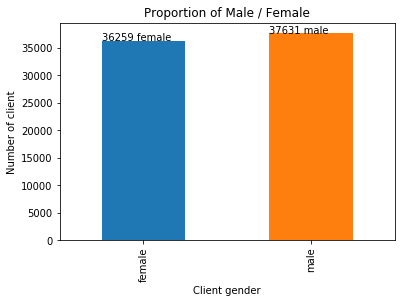

In [88]:
gender = df1.groupby('user')
data_gender = gender['user'].count()
data_gender.plot.bar()
plt.title("Proportion of Male / Female")
plt.annotate(str(data_gender[0]) + " female", (-0.25, data_gender[0]))
plt.annotate(str(data_gender[1]) + " male", (0.75, data_gender[1]))
plt.ylabel("Number of client")
plt.xlabel("Client gender")
plt.show()

### Proportion of gender according to product

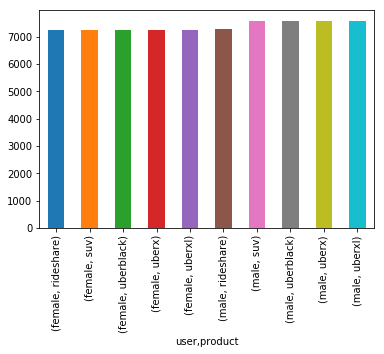

In [89]:
tmp = df1[['user', 'product']]
data = tmp.groupby(['user','product']).size()
data.plot.bar()
plt.show()

### Average fare according to uber product

product
rideshare     5.985478
suv          32.517371
uberblack    22.581474
uberx         9.511324
uberxl       11.952087
Name: fare, dtype: float64


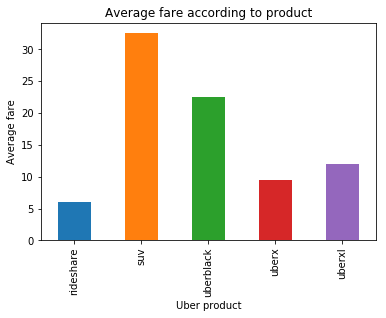

In [90]:
product = df1.groupby('product')
data_product = product['fare'].mean()
print(data_product)
data_product.plot.bar()
plt.title("Average fare according to product")
plt.ylabel("Average fare")
plt.xlabel("Uber product")
plt.show()

### Correlation between fare, distance and duration

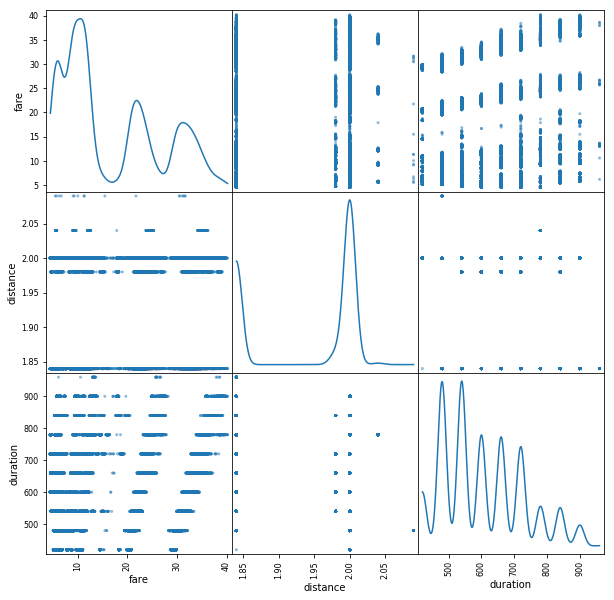

In [91]:
data = df1[['fare', 'distance', 'duration']]
pd.plotting.scatter_matrix(data, figsize=(10, 10), diagonal='kde')
plt.show()

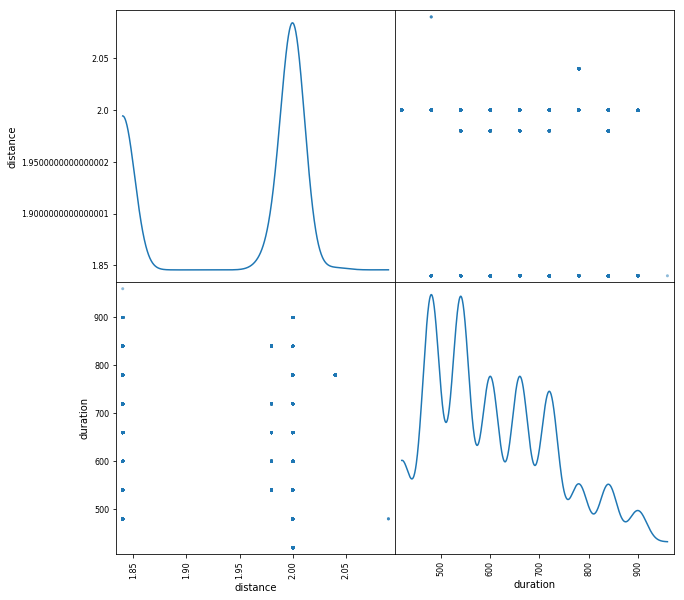

In [92]:
data = df1.loc[df1['product'] == 'uberx']
data = data[['distance', 'duration']]
pd.plotting.scatter_matrix(data, figsize=(10, 10), diagonal='kde')
plt.show()

### Does female uses uber for longer distance than male?

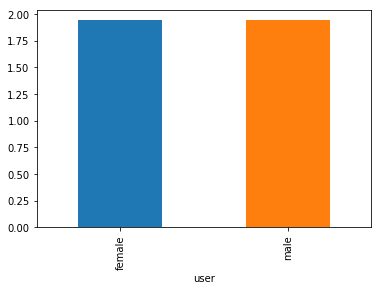

In [93]:
data = df1[['user', 'distance']]
data_gb = data.groupby('user')
data_dst = data_gb['distance'].mean()
data_dst.plot.bar()
plt.show()

### Does exit a correlation between fare and time?

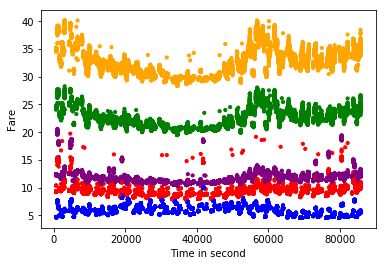

In [94]:
data = df1[['fare', 'date', 'product']]

def date_to_clock(date):
    date = date.split(' ')[1].split(':')
    second = int(date[0]) * 3600 + int(date[1]) * 60 + int(date[2])
    return second

def color_product(product):
    color_dict = {'rideshare':'blue', 'suv':'orange', 'uberblack':'green', 'uberx':'red', 'uberxl':'purple'}
    return color_dict[product]

plt.scatter(data.date.apply(date_to_clock), data.fare, s=10, c=data['product'].apply(color_product))
plt.xlabel('Time in second')
plt.ylabel('Fare')
plt.show()

The fare seem to be correlated with the date. For example, the price is highest at night and in the afternoon.

#### Let's do a logistic regression on SUV product, with fare and time

We only want to work on SUV product.

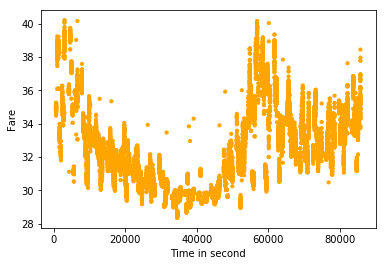

In [95]:
data = df1[['fare', 'date', 'product']]
data = data.loc[data['product'] == 'suv']

plt.scatter(data.date.apply(date_to_clock), data.fare, s=10, c=data['product'].apply(color_product))
plt.xlabel('Time in second')
plt.ylabel('Fare')
plt.show()

[[54494]
 [54494]
 [54494]
 ...
 [49955]
 [53573]
 [57187]]
[33.75 33.88 35.11 ... 30.84 33.03 36.42]


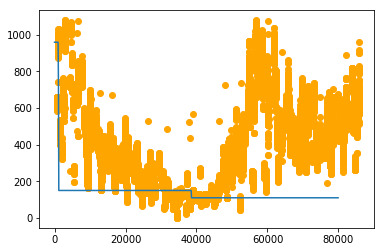

In [96]:
X = data.date.apply(date_to_clock).values.reshape(-1, 1)
Y = data.fare.values

lab_enc = preprocessing.LabelEncoder()
Y_encoded = lab_enc.fit_transform(Y)

print(X)
print(Y)

logr = LogisticRegression()
logr.fit(X, Y_encoded)

plt.scatter(X, Y_encoded, c='orange')

test = np.arange(0, 80000, 100).reshape(-1, 1)
plt.plot(test, logr.predict(test))
plt.show()